In [2]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


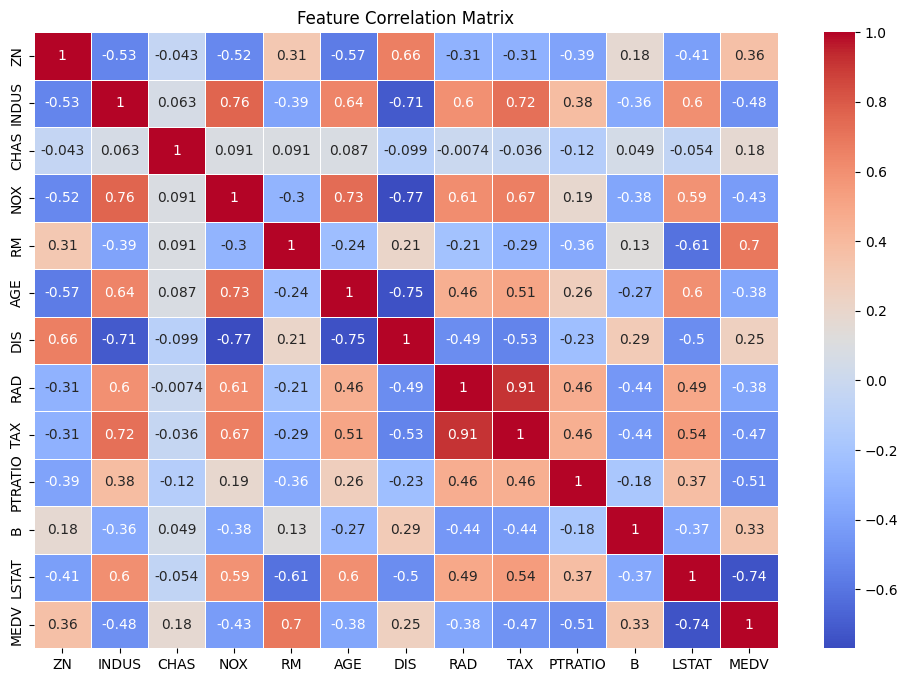

Mean Squared Error (MSE): 12.680151058148551
R2 Score: 0.7698710289185017
Mean Absolute Error (MAE): 1.5382160157529974
Mean Absolute Percentage Error (MAPE): 555.4332198973616%
Root Mean Squared Error (RMSE): 3.5609199735670205
    Actual  Predicted     Error
0  0.00632   0.544039 -0.537719
1  0.02731   0.459303 -0.431993
2  0.02729   0.459303 -0.432013
3  0.03237   0.459303 -0.426933
4  0.06905   0.459303 -0.390253


<Figure size 1200x800 with 0 Axes>

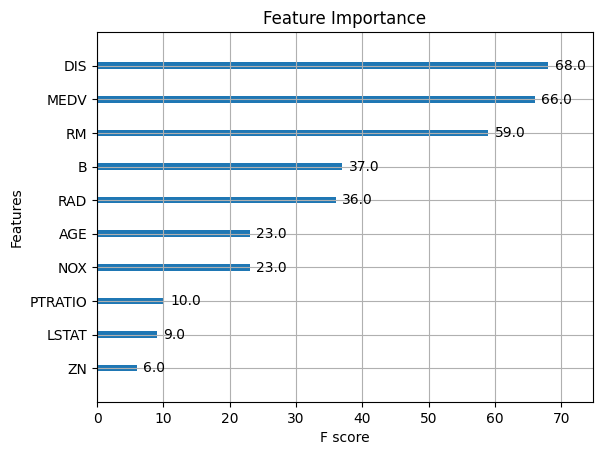

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor, plot_importance

# CSVファイルを読み込む
file_path = 'C:/Users/thisi/OneDrive/デスクトップ/Dateset1.csv'  # CSVファイルのパスを指定してください
data = pd.read_csv(file_path)

# 目的変数を指定する（例： 'target' という列が目的変数）
target_column = 'CRIM'
X = data.drop(columns=[target_column])
y = data[target_column]

# 説明変数間の相関関係を示す画像を出力
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoostモデルのハイパーパラメータのグリッドサーチ
xgb = XGBRegressor(objective='reg:squarederror')
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 最適なモデルを取得
best_model = grid_search.best_estimator_

# モデルの評価
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 全データセットに対して予測を行う
all_predictions = best_model.predict(X)

# 実測値と予測値の誤差を出力
error_df = pd.DataFrame({'Actual': y, 'Predicted': all_predictions, 'Error': y - all_predictions})
print(error_df.head())

# 予測結果をCSVファイルに出力
output_file_path = 'XGBoost_predictions.csv'
error_df.to_csv(output_file_path, index=False)

# 特徴量の重要度を示す画像を出力
plt.figure(figsize=(12, 8))
plot_importance(best_model)
plt.title('Feature Importance')
plt.show()
